In [1]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name = "deepseek-r1-distill-llama-70b", temperature = 0
)

response = llm.invoke("What is the length of the Wall of China?")

In [2]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I've heard different numbers before, so I'm a bit confused. Let me start by recalling what I know. The Great Wall is a series of fortifications built across several Chinese dynasties to protect the borders. It's a very long structure, but I'm not exactly sure how long.\n\nI remember hearing that it's over 10,000 miles long, maybe around 13,000 miles. But I also think that number might not be entirely accurate. Maybe it's shorter? I should check some sources or think about how it's measured. The wall isn't a single, continuous structure; it's made up of multiple sections built at different times. Some parts are better known than others, like the sections near Beijing which are popular tourist spots.\n\nI wonder if the length includes all the branches and spurs or just the main wall. Also, some parts might be in ruins or not easily measurable, which could affect the total length. I think in r

In [3]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I've heard different numbers before, so I'm a bit confused. Let me start by recalling what I know. The Great Wall is a series of fortifications built across several Chinese dynasties to protect the borders. It's a very long structure, but I'm not exactly sure how long.\n\nI remember hearing that it's over 10,000 miles long, maybe around 13,000 miles. But I also think that number might not be entirely accurate. Maybe it's shorter? I should check some sources or think about how it's measured. The wall isn't a single, continuous structure; it's made up of multiple sections built at different times. Some parts are better known than others, like the sections near Beijing which are popular tourist spots.\n\nI wonder if the length includes all the branches and spurs or just the main wall. Also, some parts might be in ruins or not easily measurable, which could affect the total length. I think in recent years, there

___________

#### Architecture React Agent:

```                            
                            <start>      "Hello" -> Directly generates the output without calling any tools
                                |        "Can you tell me the latest stock price of Apple?" calls the tool
                                |       
                                |
                               \ /
                            _____________
(prompt) Instruction  --->  |           |   <--- Validator  state => {"messages":[Input (question) tool generated O/P]}
                            |   LLM     |
                            _____________
                                / /  \
                               / /    \
                              / /      \
                        ___________   ____________
                        |         |   |          |
                        |  Tool   |   |  END     |
                        ___________   ____________      
                          / | \  \
                         /  |  \  \
                        /   |   \  \
                       /    |    \  \
                      /     |     \  \
                  Tool1 Tool2  Tool3 Tool4 
                             
Here,
Tool1 = Addition
Tool2 = Web-search
Tool3 = retriever (VDB)
Tool4 = Finance-API
```                            

#### Example:

```                            
                            <start>     
                                |        "What is the 10% of the Elon Musk's wealth?"
                                |       
                                |
                               \ /
                            _____________
(prompt) Instruction  --->  |           |   <--- Validator  state => {"messages":[Input (question) tool generated O/P]}
                            |   LLM     |
                            _____________
                                / /  \
                               / /    \
                              / /      \
                        ___________   ____________
                        |         |   |          |
                        |  Tool   |   |  END     |
                        ___________   ____________      
                          / | \  \
                         /  |  \  \
                        /   |   \  \
                       /    |    \  \
                      /     |     \  \
                  Tool1 Tool2  Tool3 Tool4 
                             
Here,
Tool1 = Web Crawler
Tool2 = Addition
Tool3 = DIivde
Tool4 = Finance-API
```                            

Here there are two parts of the query involved in "What is the 10% of the Elon Musk's wealth?". Tool Call procedure of the workflow:
1. ```Elon Musk's wealth``` (calls the tool1 ```Web Crawler``` and generates the output)
2. Calls the ```LLM``` validator, which checks the question and tool generated output which are in the form of a state. Since, the answer provide is not sufficient it calls the another relevant tool to address the latter part of the query. 
3. ```10% of the wealth's``` calculation (operation performed on information retrieved from the first part)
4. ```LLM``` calls the ```Divide``` ```tool3``` or the calculation.
5. Then the ```LLM``` is called yet again to validate the query and the output result by the tool. After confirming that all the parts of the query has been answered, the ```LLM``` ends the process ```END```.

In [4]:
import os

os.environ["BRAVE_SEARCH_API_KEY"] = os.getenv("BRAVE_SEARCH_API_KEY")

In [5]:
from langchain.tools import tool

In [6]:
@tool
def multiply(a:int, b:int) -> int:
    """
    Multiply two integers.
    Args:
        a(int): First integer
        b(int): Second integer
    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a:int, b:int) -> int:
    """
    Add two integers.
    Args:
        a(int): First integer
        b(int): Second integer
    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a:int, b:int) -> float:
    """
    Divide two integers.
    Args:
        a(int): First integer
        b(int): Second integer
    Returns:
        float: The division of a and b.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero")
    return a / b

#### Importing the InBuilt Tool for Web Crawling (Duck Duck Go Search)

In [7]:
# from langchain_community.tools import DuckDuckGoSearchRun
# search = DuckDuckGoSearchRun()

from langchain_community.tools import BraveSearch

search = BraveSearch()

search.invoke("What is a latest update on IPhone 17?")

'[{"title": "About iOS 17 Updates - Apple Support", "link": "https://support.apple.com/en-us/118723", "snippet": "This update provides important ... updates, please visit this website: ... This update <strong>introduces new emoji, transcripts in Apple Podcasts and includes other features, bug fixes, and security updates for your iPhone</strong>...."}, {"title": "iOS 17 - Wikipedia", "link": "https://en.wikipedia.org/wiki/IOS_17", "snippet": "It <strong>drops support for iPhones with an A11 Bionic SoC</strong>, officially marking the end of support for iPhones with a 5.5-inch display. iOS 17 is the first version of iOS to drop support for an iPhone with Face ID and no Home button. The iPhone SE (2nd and 3rd generations) are the only supported devices ..."}, {"title": "iPhone 17: Everything We Know | MacRumors", "link": "https://www.macrumors.com/roundup/iphone-17/", "snippet": "We&#x27;ve also heard that the iPhone 17 Air could have a horizontal camera bump, so this is likely to be a de

In [8]:
tools=[multiply, add, divide, search]

In [9]:
llm_with_tools = llm.bind_tools(tools)

In [10]:
response = llm_with_tools.invoke("Hi")

In [11]:
response

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 352, 'total_tokens': 423, 'completion_time': 0.381445342, 'prompt_time': 0.029762015, 'queue_time': 0.053113944999999996, 'total_time': 0.411207357}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--13c85525-43e2-4aaf-a7d4-bd44654cbb78-0', usage_metadata={'input_tokens': 352, 'output_tokens': 71, 'total_tokens': 423})

In [12]:
response.tool_calls

[]

For the normal query "Hi", no tool call is required. That's why the ```response.tool_calls``` returns an empty list

In [13]:
response = llm_with_tools.invoke("What is 2+2")

In [14]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4z8kc0wwp', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 260, 'prompt_tokens': 357, 'total_tokens': 617, 'completion_time': 1.075888652, 'prompt_time': 0.029833034, 'queue_time': 0.053160556000000005, 'total_time': 1.105721686}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3e8956f6-9c82-4fc0-965f-9fbc898cd085-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': '4z8kc0wwp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 260, 'total_tokens': 617})

In [15]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': '4z8kc0wwp',
  'type': 'tool_call'}]

However, we see that the for a particular query associated with the addition of 2 numbers, we have binded a relevant tool ```add```, hence it calls the tool ```add```. ```'name': 'add'```

In [16]:
response = llm_with_tools.invoke("What is 2 divided by 2?")

In [17]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h550xfphm', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'divide'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 228, 'prompt_tokens': 360, 'total_tokens': 588, 'completion_time': 0.929250766, 'prompt_time': 0.029958362, 'queue_time': 0.057013656999999995, 'total_time': 0.959209128}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4e72359d-6961-4a84-8c94-83282192349a-0', tool_calls=[{'name': 'divide', 'args': {'a': 2, 'b': 2}, 'id': 'h550xfphm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 360, 'output_tokens': 228, 'total_tokens': 588})

In [18]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 2, 'b': 2},
  'id': 'h550xfphm',
  'type': 'tool_call'}]

In [19]:
response = llm_with_tools.invoke("What is the current age of the TATA group?")

In [20]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3gp3tgjq8', 'function': {'arguments': '{"query":"TATA group founding year"}', 'name': 'brave_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 237, 'prompt_tokens': 362, 'total_tokens': 599, 'completion_time': 0.924666726, 'prompt_time': 0.030046401, 'queue_time': 0.05311845799999999, 'total_time': 0.954713127}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--17de25cc-574a-4f7f-892a-31fe53081fb6-0', tool_calls=[{'name': 'brave_search', 'args': {'query': 'TATA group founding year'}, 'id': '3gp3tgjq8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 362, 'output_tokens': 237, 'total_tokens': 599})

In [21]:
response.tool_calls

[{'name': 'brave_search',
  'args': {'query': 'TATA group founding year'},
  'id': '3gp3tgjq8',
  'type': 'tool_call'}]

We see that the tool calling returns an empty response to the content ```content=''```, it is because we have not orchestrated using langgraph using ```ToolNode``` method.


In [22]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

In [23]:
builder = StateGraph(MessagesState)

In [24]:
# To maintain the context and behaviour of the LLM.

SYSTEM_PROMPT = "You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [25]:
def function_1(state: MessagesState):
    user_question = state["messages"]

    input_question =[SYSTEM_PROMPT]+user_question

    response = llm_with_tools.invoke(input_question)

    # this reponse will be sent to the "tools_condition" function
    return {"messages": [response]}


In [26]:
builder.add_node("llm_decision_step", function_1)

In [27]:
builder.add_node("tools", ToolNode(tools))

In [28]:
builder.add_edge(START, "llm_decision_step")

Instead of creating a custom ```router``` function, we are utilizing the ```tools_condition``` prebuilt function available in langchain module which basically does the same thing.

In [29]:
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
    )
                          

In [30]:
builder.add_edge("tools", "llm_decision_step")

In [31]:
builder.add_edge("llm_decision_step", END)

In [32]:
react_graph  = builder.compile()

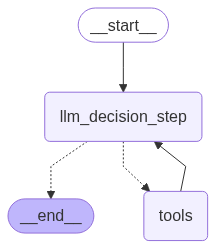

In [33]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [34]:
message=[HumanMessage(content="What is the 2 times of Narendra Modi's age?")]

In [35]:

react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content="What is the 2 times of Narendra Modi's age?", additional_kwargs={}, response_metadata={}, id='529c93ef-3f95-471d-8df2-75fcbc076a90'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'j1sqtj41t', 'function': {'arguments': '{"query":"Narendra Modi age 2023"}', 'name': 'brave_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 321, 'prompt_tokens': 382, 'total_tokens': 703, 'completion_time': 1.421659863, 'prompt_time': 0.024760191, 'queue_time': 0.054121327999999996, 'total_time': 1.446420054}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--488773c9-7482-4ec0-9f66-5981bc973bcf-0', tool_calls=[{'name': 'brave_search', 'args': {'query': 'Narendra Modi age 2023'}, 'id': 'j1sqtj41t', 'type': 'tool_call'}], usage_metadata={'input_tokens': 382, 'output_tokens': 321, 'total_tokens': 703}),
  ToolMessage(conten

In [36]:
message=[HumanMessage(content="How much is the net worth of Elon Musk, anf divide it by 2?")]

react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, anf divide it by 2?', additional_kwargs={}, response_metadata={}, id='7d0b0565-0843-4a16-9063-cbc311567f2b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'n0ym923z1', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'brave_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 279, 'prompt_tokens': 388, 'total_tokens': 667, 'completion_time': 1.014545455, 'prompt_time': 0.025079856, 'queue_time': 0.052614564, 'total_time': 1.039625311}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f9bbdd4f-f6a0-4f1e-9934-58cf298e4ae8-0', tool_calls=[{'name': 'brave_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'n0ym923z1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 388, 'output_tokens': 279, 'total_tokens': 667}),
  ToolMes

In [37]:
message=[HumanMessage(content="What is the speed of light in m/s, and divide it by 10")]

response =react_graph.invoke({"messages": message})

In [38]:
response

{'messages': [HumanMessage(content='What is the speed of light in m/s, and divide it by 10', additional_kwargs={}, response_metadata={}, id='b0614e2c-3e1e-49fe-9677-6f03b1f7d514'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sjjzksyv4', 'function': {'arguments': '{"a":299792458,"b":10}', 'name': 'divide'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 316, 'prompt_tokens': 386, 'total_tokens': 702, 'completion_time': 1.1490909089999999, 'prompt_time': 0.031767206, 'queue_time': 0.058239244, 'total_time': 1.180858115}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3c87b812-ccb3-4490-b57b-d8aca03130d6-0', tool_calls=[{'name': 'divide', 'args': {'a': 299792458, 'b': 10}, 'id': 'sjjzksyv4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 386, 'output_tokens': 316, 'total_tokens': 702}),
  ToolMessage(content='29979245.8', name='div

In [39]:
response["messages"][-1].content

'The speed of light in meters per second is approximately \\(299,792,458 \\, \\text{m/s}\\). Dividing this by 10 gives:\n\n\\[\n\\frac{299,792,458}{10} = 29,979,245.8 \\, \\text{m/s}\n\\]\n\nSo, the result is **29,979,245.8 m/s**.'

In [40]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s, and divide it by 10
================================== Ai Message ==================================
Tool Calls:
  divide (sjjzksyv4)
 Call ID: sjjzksyv4
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: divide

29979245.8
================================== Ai Message ==================================

The speed of light in meters per second is approximately \(299,792,458 \, \text{m/s}\). Dividing this by 10 gives:

\[
\frac{299,792,458}{10} = 29,979,245.8 \, \text{m/s}
\]

So, the result is **29,979,245.8 m/s**.


In [41]:
import yfinance as yf

In [42]:
@tool

def get_stock_price(ticker:str) -> str:
    """
    Fetches the previous closing price of a given stock ticler from Yahoo Finance.

    Args:
        ticker(str): The stock ticker symbol of the stock to fetch the price for. (e.g. "AAPL", "GOOG", "TSLA")
    Returns:
        str: A message with the stock's previous closing price.
    """

    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Cound not fetch price for ticker '{ticker}'."
        return f"The previous closing price of {ticker.upper()} is ${price:.2f}."
    except Exception as e:
        return f"Error fetching price for {ticker}: {str(e)}"

In [43]:
get_stock_price("AAPL")

/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_99611/1558992921.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_stock_price("AAPL")


'The previous closing price of AAPL is $212.44.'

In [44]:
get_stock_price("GOOG")

'The previous closing price of GOOG is $179.76.'

In [45]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\nArgs:\n    a(int): First integer\n    b(int): Second integer\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x109b105e0>),
 StructuredTool(name='add', description='Add two integers.\nArgs:\n    a(int): First integer\n    b(int): Second integer\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x109b10720>),
 StructuredTool(name='divide', description='Divide two integers.\nArgs:\n    a(int): First integer\n    b(int): Second integer\nReturns:\n    float: The division of a and b.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x109b10e00>),
 BraveSearch(search_wrapper=BraveSearchWrapper(api_key=SecretStr('**********'), search_kwargs={}, base_url='https://api.search.brave.com/res/v1/web/search'))]

In [46]:
tools = [add, divide, multiply, search, get_stock_price]

In [47]:
llm.bind_tools(tools)

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1093b0d70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1093b1940>, model_name='deepseek-r1-distill-llama-70b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\nArgs:\n    a(int): First integer\n    b(int): Second integer\nReturns:\n    int: The sum of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'divide', 'description': 'Divide two integers.\nArgs:\n    a(int): First integer\n    b(int): Second integer\nReturns:\n    float: The division of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'func

In [48]:
response =llm_with_tools.invoke("Get me the latest stock price of Adani Enterprises")

In [49]:
response.tool_calls

[{'name': 'brave_search',
  'args': {'query': 'latest stock price of Adani Enterprises'},
  'id': '717w3g5w6',
  'type': 'tool_call'}]

In [50]:
# To maintain the context and behaviour of the LLM.

# SYSTEM_PROMPT = SystemMessage(content="You are a helpful assistant tasked with using search, the yahoo finance tool, and performing arithmetic on a set of inputs.")

SYSTEM_PROMPT = "You are a helpful assistant tasked with using search, the yahoo finance tool, and performing arithmetic on a set of inputs."

def function_1(state: MessagesState):
    user_question = state["messages"]

    input_question =[SYSTEM_PROMPT]+user_question

    response = llm_with_tools.invoke(input_question)

    # this reponse will be sent to the "tools_condition" function
    return {"messages": [response]}

In [51]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_descision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_descision_step")
workflow.add_conditional_edges("llm_descision_step", tools_condition,)
workflow.add_edge("tools", "llm_descision_step")

react_graph2 = workflow.compile()

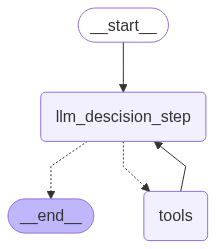

In [52]:
display(Image(react_graph2.get_graph().draw_mermaid_png()))

In [53]:
message=[HumanMessage(content="Add 1000 to the stock price of Apple.")]

response =react_graph2.invoke({"messages": message})

In [54]:
response

{'messages': [HumanMessage(content='Add 1000 to the stock price of Apple.', additional_kwargs={}, response_metadata={}, id='b154a769-8207-402d-a527-ccef287336c1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ygkw44cwx', 'function': {'arguments': '{"query":"current stock price of Apple"}', 'name': 'brave_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 773, 'total_tokens': 877, 'completion_time': 0.388109856, 'prompt_time': 0.058162115, 'queue_time': -1.702214018, 'total_time': 0.446271971}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--cc6f105e-5c2e-40a4-b7ee-fd3323bb6637-0', tool_calls=[{'name': 'brave_search', 'args': {'query': 'current stock price of Apple'}, 'id': 'ygkw44cwx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 773, 'output_tokens': 104, 'total_tokens': 877}),
  ToolMessage(content=

In [55]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Add 1000 to the stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  brave_search (ygkw44cwx)
 Call ID: ygkw44cwx
  Args:
    query: current stock price of Apple
================================= Tool Message =================================
Name: brave_search

[{"title": "Stock Price - Apple", "link": "https://investor.apple.com/stock-price/default.aspx", "snippet": "We cannot provide a description for this page right now"}, {"title": "AAPL: Apple Inc - Stock Price, Quote and News - CNBC", "link": "https://www.cnbc.com/quotes/AAPL", "snippet": "Get <strong>Apple</strong> Inc (AAPL:NASDAQ) real-time <strong>stock</strong> quotes, news, <strong>price</strong> and financial information from CNBC."}, {"title": "Apple Inc. (AAPL) Stock Price, News, Quote & History - Yahoo Finance", "link": "https://finance.yahoo.com/quote/AAPL/", "snippet": "Fin

In [56]:
message=[HumanMessage(content="Add 1000 to the stock price of Apple with the latest news of the apple.")]

response =react_graph2.invoke({"messages": message})

In [57]:
response

{'messages': [HumanMessage(content='Add 1000 to the stock price of Apple with the latest news of the apple.', additional_kwargs={}, response_metadata={}, id='e0f83fc6-9d62-4574-ae88-52ea23e949ed'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ahraxtn19', 'function': {'arguments': '{"a":150,"b":1000}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 362, 'prompt_tokens': 394, 'total_tokens': 756, 'completion_time': 1.316363636, 'prompt_time': 0.032549176, 'queue_time': 0.058540602, 'total_time': 1.348912812}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--73de96fb-08ff-4266-82bd-05d486058c68-0', tool_calls=[{'name': 'add', 'args': {'a': 150, 'b': 1000}, 'id': 'ahraxtn19', 'type': 'tool_call'}], usage_metadata={'input_tokens': 394, 'output_tokens': 362, 'total_tokens': 756}),
  ToolMessage(content='1150', name='add', id='cc6

In [58]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Add 1000 to the stock price of Apple with the latest news of the apple.
================================== Ai Message ==================================
Tool Calls:
  add (ahraxtn19)
 Call ID: ahraxtn19
  Args:
    a: 150
    b: 1000
================================= Tool Message =================================
Name: add

1150
================================== Ai Message ==================================

To add 1000 to the stock price of Apple considering the latest news, follow these steps:

1. **Find the Current Stock Price of Apple:**
   - Use the Yahoo Finance tool to get the latest stock price of Apple (AAPL).

2. **Review the Latest News About Apple:**
   - Look up recent news articles about Apple to understand any factors that might be affecting the stock price, such as earnings reports, product launches, or market trends.

3. **Add 1000 to the Stock Price:**
   - Take the current stock price 

In [59]:
message=[HumanMessage(content="Current stock price of Apple with the latest news of the apple.")]

response =react_graph2.invoke({"messages": message})

In [60]:
response

{'messages': [HumanMessage(content='Current stock price of Apple with the latest news of the apple.', additional_kwargs={}, response_metadata={}, id='50180483-8cf5-4a35-8fe0-639bba319f2c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't9jhrxgn9', 'function': {'arguments': '{"query":"current stock price of Apple"}', 'name': 'brave_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 343, 'prompt_tokens': 389, 'total_tokens': 732, 'completion_time': 1.628082324, 'prompt_time': 0.025393441, 'queue_time': 0.055767, 'total_time': 1.653475765}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8fa16c09-98ed-48f5-b220-c00ab6d328f5-0', tool_calls=[{'name': 'brave_search', 'args': {'query': 'current stock price of Apple'}, 'id': 't9jhrxgn9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 389, 'output_tokens': 343, 'total_tokens': 732}),


In [61]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Current stock price of Apple with the latest news of the apple.
================================== Ai Message ==================================
Tool Calls:
  brave_search (t9jhrxgn9)
 Call ID: t9jhrxgn9
  Args:
    query: current stock price of Apple
================================= Tool Message =================================
Name: brave_search

[{"title": "Stock Price - Apple", "link": "https://investor.apple.com/stock-price/default.aspx", "snippet": "We cannot provide a description for this page right now"}, {"title": "AAPL: Apple Inc - Stock Price, Quote and News - CNBC", "link": "https://www.cnbc.com/quotes/AAPL", "snippet": "Get <strong>Apple</strong> Inc (AAPL:NASDAQ) real-time <strong>stock</strong> quotes, news, <strong>price</strong> and financial information from CNBC."}, {"title": "Apple Inc. (AAPL) Stock Price, News, Quote & History - Yahoo Finance", "link": "https://finance.yahoo.com/quo

__________

#### Agenda for the next Class:

1. human in the loop
2. Agentic RAG
3. multiagent system (collaboration and supervisor)
4. langgraph miscellaneous concept: sub graph, parallel execution, etc.


________

#### Assignment: AI Travel Agent Planner (Purpose: Trip Planning for any city worldwide.)

1. Real-time weather information
2. Top attractions and activities
3. Hotel cost calculation (per day * total days)
4. Currency conversion to user's native currency
5. Complete iternary generation 
6. Total expense calculation
7. Generate a summary of the entire output.

Workflow:

user_input

search attraction and activity
1, search ttraction
2. search restaurant
3. search activity
4. search transportation

search weather forecasting
1. get current weather
2. get weather forecast

search hotel costs
1. search hotel
2. estimate the hostel cost
3. budget_range

calculate the total cost
1. add
2. multiply
3. calculate the total cost
4. calculate the daily budget

currency coversion
1. get exchange rate
2. convert currency

Iternary generation
1. get day plan
2. create full iternary

Create Summary

Return complete travel plans

Note: If you know the OOPS then design the entire system using objects amd classses in modular fashion.